In [57]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.preprocessing import LabelEncoder , StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to C:\Users\SAURABH
[nltk_data]     VAJE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [59]:
df_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [60]:
# target columns label

In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


data type 
- numerical(id, label)
- tex ( title, author, text)

In [62]:
df_train.shape

(20800, 5)

In [63]:
df_train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [64]:
df_train['title'] = df_train['title'].fillna("")
df_train['text'] = df_train['text'].fillna("")

In [65]:
df_train['author'] = df_train['author'].fillna("Unknown")

In [66]:
df_train['author'].unique()

array(['Darrell Lucus', 'Daniel J. Flynn', 'Consortiumnews.com', ...,
       'D. Samuelson', 'Judge Andrew Napolitano',
       'Michael J. de la Merced and Rachel Abrams'], dtype=object)

In [67]:
df_train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [68]:
# merging the author name and news title
df_train['content'] = df_train['author']+' '+df_train['title']

In [69]:
# Preprocess test data to match training
df_test['title'] = df_test['title'].fillna("")
df_test['author'] = df_test['author'].fillna("Unknown")
df_test['text'] = df_test['text'].fillna("")
df_test['content'] = df_test['author'] + ' ' + df_test['title']

In [70]:
df_train['content'].head()

0    Darrell Lucus House Dem Aide: We Didn’t Even S...
1    Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2    Consortiumnews.com Why the Truth Might Get You...
3    Jessica Purkiss 15 Civilians Killed In Single ...
4    Howard Portnoy Iranian woman jailed for fictio...
Name: content, dtype: object

In [71]:
port_stemmer = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stemmer.stem(word) for word in stemmed_content if word not in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [72]:
df_train['content'] = df_train['content'].apply(stemming)
df_train.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrel lucu hous dem aid even see comey letter...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,daniel j flynn flynn hillari clinton big woman...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnew com truth might get fire
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss civilian kill singl us airstri...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoy iranian woman jail fiction unpu...


In [73]:
# Apply the same stemming function
df_test['content'] = df_test['content'].apply(stemming)
print(df_test[['content']].head())  # Show first 5 rows


                                             content
0  david streitfeld specter trump loosen tongu pu...
1  unknown russian warship readi strike terrorist...
2  common dream nodapl nativ american leader vow ...
3  daniel victor tim tebow attempt anoth comeback...
4   truth broadcast network keiser report meme war e


In [74]:
# Use full df_train
vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(df_train['content'])
Y = df_train['label']

In [75]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 205512 stored elements and shape (20800, 10000)>
  Coords	Values
  (0, 2163)	0.3598939188262559
  (0, 5254)	0.3635963806326075
  (0, 4154)	0.21874169089359144
  (0, 2282)	0.2705332480845492
  (0, 177)	0.27010124977708766
  (0, 2988)	0.233316966909351
  (0, 7910)	0.2565896679337957
  (0, 1761)	0.2468450128533713
  (0, 5080)	0.29212514087043684
  (0, 4549)	0.24785219520671603
  (0, 1468)	0.3676519686797209
  (0, 9233)	0.28485063562728646
  (1, 2145)	0.26373768806048464
  (1, 3317)	0.7143299355715573
  (1, 4050)	0.1904660198296849
  (1, 1668)	0.19094574062359204
  (1, 885)	0.2939891562094648
  (1, 9817)	0.30071745655510157
  (1, 1318)	0.3827320386859759
  (1, 1126)	0.15521974226349364
  (2, 1863)	0.46097489583229645
  (2, 1752)	0.3179886800654691
  (2, 9189)	0.41544962664721613
  (2, 5651)	0.49351492943649944
  (2, 3598)	0.3474613386728292
  :	:
  (20797, 5632)	0.17455348025522197
  (20797, 4179)	0.21799048897828685
  (20797, 2

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0,stratify=Y)

In [77]:
X.shape, X_train.shape, X_test.shape

((20800, 10000), (16640, 10000), (4160, 10000))

In [78]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [79]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.9891826923076923


In [80]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.9798076923076923


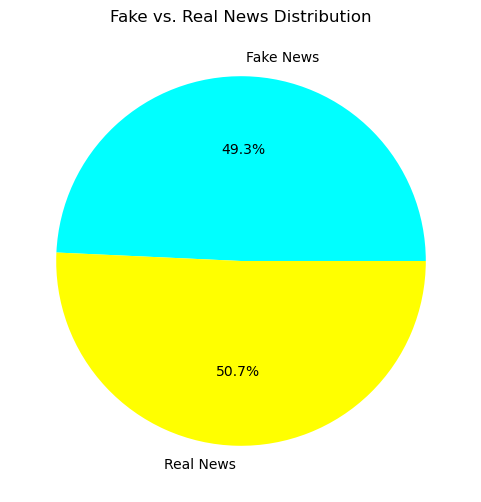

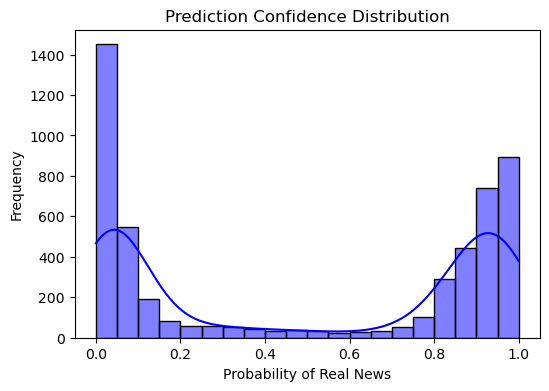

In [ ]:
# Transform using the same vectorizer
X_test = vectorizer.transform(df_test['content'])

# Make predictions
predictions = model.predict(X_test)

import matplotlib.pyplot as plt

# Count the predictions
fake_count = (predictions == 0).sum()
real_count = (predictions == 1).sum()

# Plot the pie chart
plt.figure(figsize=(6,6))
plt.pie([fake_count, real_count], labels=["Fake News", "Real News"], autopct="%1.1f%%", colors=["Cyan", "yellow"])
plt.title("Fake vs. Real News Distribution")
plt.show()


import seaborn as sns

# Check if the model supports probability predictions
if hasattr(model, "predict_proba"):
    probabilities = model.predict_proba(X_test)[:, 1]  # Probability of being real news

    # Plot the histogram
    plt.figure(figsize=(6,4))
    sns.histplot(probabilities, bins=20, kde=True, color="blue")
    plt.xlabel("Probability of Real News")
    plt.ylabel("Frequency")
    plt.title("Prediction Confidence Distribution")
    plt.show()
else:
    print("The model does not support probability predictions.")


In [82]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, Y, cv=5) 
print("Cross-validation scores:", scores)
print("Mean CV score:", scores.mean())

Cross-validation scores: [0.98052885 0.97908654 0.98245192 0.97908654 0.97980769]
Mean CV score: 0.9801923076923078


In [83]:
# Save predictions to a CSV file
submission = pd.DataFrame({'id': df_test['id'], 'label': predictions})
submission.to_csv('submission.csv', index=False)